# Theory
## For examples of my Machine Learning Models please scroll down to "Classification"

Supervised Learning is to predict a specific outcome. And then unsupervised learning takes data as an input and find relationships and structures.
1. Financial Application
    You can use supervised learning to predict the price of a particular stocks. You could use unsupervised learning to gain insights on how stocks behave in general by giving the model raw data. Like EDA on steriods.
2. Medical Application
    You can used many different types of machine learning models to predict a diagnosis based on other data points gathered about a patient. Or for unsupervised learning you could feed in medical charts to find out which data points are important to collect to in order to classiy different diagnoses.


## Regression vs Classification

Regression predicts continuous values. Classification predicts categorical or discreet values.
Regression- Linear, Ridge and Lasso Regression, Support Vector Machines
Classification- Neural Networks, Decision Trees, K-Nearest Neighbors

## Bias and Variance

High bias is when the model is too simple. This leads to underfitting and poor predictions because the model ignores too much noise. High variance is when the model is oversensitive and becomes overfit. This will result in a model that can't processnew data. The tradeoff is figuring out which model has the least Bias and Variance. This is delicate since the two concepts have an inverse relationship.
To combat underfitting
    You can add more features
    Increase Regularization
    Find a more complex model
To combat overfitting
    You can inverse the above
    You can also preform crossvalidation
    Use more training data
    You can make ensemble models

## Splitting Data

You need a training and testing split so that you know that your model can handle new data. It is best practice to include a validation set as well. Validation offers feedback that can help fit the model and tune hyperparameters. This will then feed back into train and then the test set is the final measure of the model efficacy. Cross validation is a solid method to increase generalizability. Regularizations can help. There's other methods too, hyperparameter tuning, feature selection, data augmentation, transfer learning, early stopping

## Metrics

### Classification
### 1. Accuracy: Accuracy is the percentage of correct predictions of all the predictions. It is not always the best method depending on the context of the data
### 2. F1 Score: Is the mean of Precision and Recall. Precision- is proportion of true positives. Recall- is proportion of true negatives. F1 is more robust for different datasets
### Regression
### 1. Mean Squared Error: The average squared difference between predicted and actual values.The lower the MSE the more fitted the model is
### 2. Mean Absolute Error: Same as MSE only not squared. Less sensitive to outliers.

In [ ]:
import pandas as pd
import numpy as np

# Classification
Here, we're going to be trying to predict whether or not a student was placed or not placed within a particular campus based off several columns. To be specific, we will be trying to predict the column "status" based off of all other columns within the dataset.

Note: This is an already slightly preproccessed dataset. If you're interested in the meaning of the columns, please go to https://www.kaggle.com/datasets/benroshan/factors-affecting-campus-placement

In [ ]:
data = pd.read_csv("data/Placement_Data_Full_Class.csv")
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [ ]:
# Delete the sl_no column and the salary column.
data= data.drop(columns=['sl_no', 'salary'])

In [ ]:
data.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status'],
      dtype='object')

In [ ]:
# Transform the categorical columns into one-hot encoded columns.
data= pd.get_dummies(data, columns=['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation'])

In [ ]:
# Transform the status into either 0 or 1.
from sklearn.preprocessing import LabelEncoder
encoder= LabelEncoder()
data['status']= encoder.fit_transform(data['status'])

In [ ]:
# Split your dataset into, train, validate, and test

from sklearn.model_selection import train_test_split

X= data.drop(columns=['status'])
y= data['status']

X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size= 0.3, random_state= 42)

X_test, X_val, y_test, y_val= train_test_split(X_temp, y_temp, test_size= 0.5, random_state=42)


In [ ]:

# Use classiftication algorithms with their default hyperparameters in order to get predictions for "status".
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from warnings import simplefilter
simplefilter(action='ignore', category= FutureWarning)

In [ ]:
#Validation
lr= LogisticRegression(max_iter= 1000)
dt= DecisionTreeClassifier()
kn= KNeighborsClassifier()
#Fitting
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
kn.fit(X_train, y_train)
#Validation Predictiona
y_lr_pred_val= lr.predict(X_val)
y_dt_pred_val= dt.predict(X_val)
y_kn_pred_val= kn.predict(X_val)
#Test Predictions
y_lr_pred_test = lr.predict(X_test)
y_dt_pred_test = dt.predict(X_test)
y_kn_pred_test = kn.predict(X_test)

In [ ]:
# For this dataset, what do you think is the best metric to use and why?
#Here are some ANSCI codes for the print formatting later
bold = "\033[1m"
reset = "\033[0m"

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#Accuracy of all 3 model's validation
print(f'{bold}Accuracy\n{reset}')
accuracy_lr_val= accuracy_score(y_val, y_lr_pred_val)
accuracy_dt_val= accuracy_score(y_val, y_dt_pred_val)
accuracy_kn_val= accuracy_score(y_val, y_kn_pred_val)
#Accuracy of all 3 model's testing
accuracy_lr_test= accuracy_score(y_test, y_lr_pred_test)
accuracy_dt_test= accuracy_score(y_test, y_dt_pred_test)
accuracy_kn_test= accuracy_score(y_test, y_kn_pred_test)
#Printing results
print('Validation\n')
print(f"Logistic Regression Validation Accuracy: {accuracy_lr_val}")
print(f"Decision Tree Validation Accuracy: {accuracy_dt_val}")
print(f"K-Nearest Neighbors Validation Accuracy: {accuracy_kn_val}\n")
print('Test\n')
print(f"Logistic Regression Test Accuracy: {accuracy_lr_test}")
print(f"Decision Tree Test Accuracy: {accuracy_dt_test}")
print(f"K-Nearest Neighbors Test Accuracy: {accuracy_kn_test}\n")

#Precision all 3 model's validation and testing
print(f'{bold}Precision\n{reset}')
precision_lr_val= precision_score(y_val, y_lr_pred_val)
precision_dt_val= precision_score(y_val, y_dt_pred_val)
precision_kn_val= precision_score(y_val, y_kn_pred_val)

precision_lr_test= precision_score(y_test, y_lr_pred_test)
precision_dt_test= precision_score(y_test, y_dt_pred_test)
precision_kn_test= precision_score(y_test, y_kn_pred_test)
#Printing
print('Validation\n')
print(f"Logistic Regression Validation Precision: {precision_lr_val}")
print(f"Decision Tree Validation Precision: {precision_dt_val}")
print(f"K-Nearest Neighbors Validation Precision: {precision_kn_val}\n")
print('Test\n')
print(f"Logistic Regression Test Precision: {precision_lr_test}")
print(f"Decision Tree Test Precision: {precision_dt_test}")
print(f"K-Nearest Neighbors Precision: {precision_kn_test}\n")

#Recall
print(f'{bold}Recall\n{reset}')

recall_lr_val= recall_score(y_val, y_lr_pred_val)
recall_dt_val= recall_score(y_val, y_dt_pred_val)
recall_kn_val= recall_score(y_val, y_kn_pred_val)

recall_lr_test= recall_score(y_test, y_lr_pred_test)
recall_dt_test= recall_score(y_test, y_dt_pred_test)
recall_kn_test= recall_score(y_test, y_kn_pred_test)

print('Validation\n')
print(f"Logistic Regression Validation Recall: {recall_lr_val}")
print(f"Decision Tree Validation Recall: {recall_dt_val}")
print(f"K-Nearest Neighbors Validation Recall: {recall_kn_val}\n")

print('Test\n')
print(f"Logistic Regression Test Recall: {recall_lr_test}")
print(f"Decision Tree Test Recall: {recall_dt_test}")
print(f"K-Nearest Neighbors Recall: {recall_kn_test}\n")
#F1 
print(f'{bold}F1\n{reset}')
f1_lr_val= f1_score(y_val, y_lr_pred_val)
f1_dt_val= f1_score(y_val, y_dt_pred_val)
f1_kn_val= f1_score(y_val, y_kn_pred_val)

f1_lr_test= f1_score(y_test, y_lr_pred_test)
f1_dt_test= f1_score(y_test, y_dt_pred_test)
f1_kn_test= f1_score(y_test, y_kn_pred_test)

print('Validation\n')

print(f"Logistic Regression Validation F1: {f1_lr_val}")
print(f"Decision Tree Validation F1: {f1_dt_val}")
print(f"K-Nearest Neighbors Validation F1: {f1_kn_val}\n")

print('Test\n')

print(f"Logistic Regression Test F1: {f1_lr_test}")
print(f"Decision Tree Test F1: {f1_dt_test}")
print(f"K-Nearest Neighbors F1: {f1_kn_test}")


Accuracy

Validation

Logistic Regression Validation Accuracy: 0.7575757575757576
Decision Tree Validation Accuracy: 0.7575757575757576
K-Nearest Neighbors Validation Accuracy: 0.7272727272727273

Test

Logistic Regression Test Accuracy: 0.875
Decision Tree Test Accuracy: 0.875
K-Nearest Neighbors Test Accuracy: 0.8125

Precision

Validation

Logistic Regression Validation Precision: 0.7727272727272727
Decision Tree Validation Precision: 0.7727272727272727
K-Nearest Neighbors Validation Precision: 0.72

Test

Logistic Regression Test Precision: 0.8846153846153846
Decision Tree Test Precision: 0.9166666666666666
K-Nearest Neighbors Precision: 0.8214285714285714

Recall

Validation

Logistic Regression Validation Recall: 0.85
Decision Tree Validation Recall: 0.85
K-Nearest Neighbors Validation Recall: 0.9

Test

Logistic Regression Test Recall: 0.9583333333333334
Decision Tree Test Recall: 0.9166666666666666
K-Nearest Neighbors Recall: 0.9583333333333334

F1

Validation

Logistic Regress

The best metric for this problem is a combination of recall and precision, which is the F1 score. This will provide the best balance between minimizing false negatives and positives while not overfitting the model.

# Model Scores Using F1
# F1
## Validation
### LR= .81
### DT= .86
### KN= .8
## Test
### LR= .92
### DT= .85
### KN= .88


In [ ]:
# Using 5-fold cross validation, computing the averaged score for each of the three models.

from sklearn.model_selection import KFold, cross_val_score

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

lr = LogisticRegression(max_iter=1000)
dt = DecisionTreeClassifier()
kn = KNeighborsClassifier()

kf = KFold(n_splits=5, shuffle=True, random_state=42)

f1_lr = np.mean(cross_val_score(lr, X_train_val, y_train_val, cv=kf, scoring='f1'))
f1_dt = np.mean(cross_val_score(dt, X_train_val, y_train_val, cv=kf, scoring='f1'))
f1_kn = np.mean(cross_val_score(kn, X_train_val, y_train_val, cv=kf, scoring='f1'))


print(f"Logistic Regression Average F1 score: {f1_lr}")
print(f"Decision Tree Average F1 score: {f1_dt}")
print(f"K-Nearest Neighbors Average F1 score: {f1_kn}")

Logistic Regression Average F1 score: 0.89114372310117
Decision Tree Average F1 score: 0.8668257232963116
K-Nearest Neighbors Average F1 score: 0.8829502572898799


# Regression
Within this dataset, we're going to try to predict the medical charges of a patient based on 6 columns: age, sex, bmi, the number of children, whether or not someone is a smoker and the region of the patient. 

Note: The original dataset was found here: https://www.kaggle.com/mirichoi0218/insurance

In [ ]:
# Load in the medical insurance cost dataset.
data = pd.read_csv("data/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Transform the categorical variables into one-hot encoded variables.
data= pd.get_dummies(data, columns=['region', 'smoker', 'sex'])


In [ ]:
# Split your dataset into a training and testing set using an 80/20 split.
    
from sklearn.model_selection import train_test_split

X= data.drop(columns=['charges'])
y= data['charges']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 42)


In [ ]:
# Using Linear Regression, a Decision Tree, and a Random Forest, predict charges.

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

ln= LinearRegression()
dr= DecisionTreeRegressor()
rf= RandomForestRegressor()

ln.fit(X_train, y_train)
dr.fit(X_train, y_train)
rf.fit(X_train, y_train)

y_pred_ln= ln.predict(X_test)
y_pred_dr= dr.predict(X_test)
y_pred_rf= rf.predict(X_test)




In [ ]:
# Assume that we're about to present to a stakeholders and business people who do not quite understand data science.
# If this is the case, which metric would be the best to use to explain the models to stakeholders?

#RMSE and MAE are both suitable. MAE might be easier to understand for non technical stakeholders. I will look at both
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse

mae_lr = mae(y_test, y_pred_ln)
mae_dr = mae(y_test, y_pred_dr)
mae_rf = mae(y_test, y_pred_rf)

print(f'{bold}Mean Absolute Error{reset}\n')
print(f"Linear Regression Mean Absolute Error: {mae_lr}")
print(f"Decision Tree Mean Absolute Error: {mae_dr}")
print(f"Random Forest Mean Absolute Error: {mae_rf}\n")
      
rmse_lr = rmse(y_test, y_pred_ln)
rmse_dr = rmse(y_test, y_pred_dr)
rmse_rf = rmse(y_test, y_pred_rf)
      
print(f'{bold}Root Mean Squared Error{reset}\n')
      
print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Decision Tree RMSE: {rmse_dr}")
print(f"Random Forest RMSE: {rmse_rf}\n")


Mean Absolute Error

Linear Regression Mean Absolute Error: 4181.194473753648
Decision Tree Mean Absolute Error: 2990.847393354478
Random Forest Mean Absolute Error: 2500.8357445522647

Root Mean Squared Error

Linear Regression RMSE: 33596915.851361476
Decision Tree RMSE: 39909145.33619889
Random Forest RMSE: 21283231.258581653



In [ ]:
#If the stakeholders don't care about outliers as much we can use the MAE and see that the random forest
#preformed the best.
#If we are more concerned about building models robust to outliers we can see from the RMSE that random forest also worked best.

In [ ]:
#Cross Validation
rf_rmse_scores = np.sqrt(-cross_val_score(ln, X_train, y_train, cv=5, scoring='neg_mean_squared_error'))
print("Random Forest RMSE scores:", rf_rmse_scores)
print("Random Forest RMSE mean:", rf_rmse_scores.mean())


Random Forest RMSE scores: [6334.96905353 5663.6591115  5992.51101164 6825.71740716 5918.61313625]
Random Forest RMSE mean: 6147.093944016904


In [ ]:
# For the linear regression model, print out the intercept and the coefficients.
print("Intercept:", ln.intercept_)
print("Coefficients:", ln.coef_)

Intercept: -574.5357125102073
Coefficients: [ 2.56975706e+02  3.37092552e+02  4.25278784e+02  4.59585244e+02
  8.89079180e+01 -1.98279052e+02 -3.50214110e+02 -1.18255644e+04
  1.18255644e+04  9.29584582e+00 -9.29584582e+00]


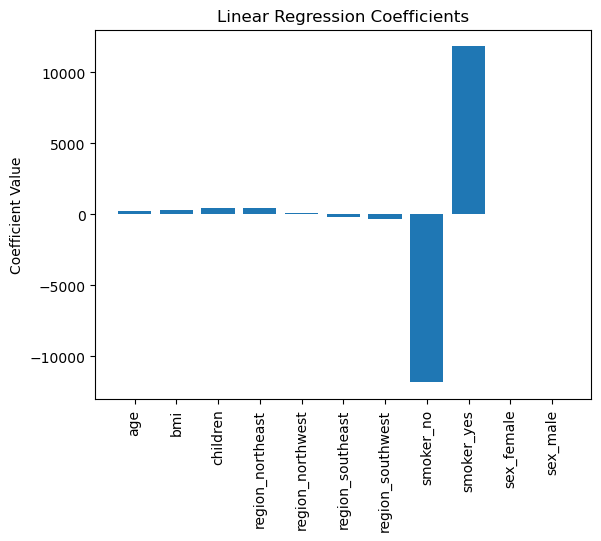

In [ ]:
#Plotting the coefficients
import matplotlib.pyplot as plt
plt.bar(X_train.columns, ln.coef_)
plt.xticks(rotation=90)
plt.ylabel('Coefficient Value')
plt.title('Linear Regression Coefficients')

plt.show()

In [ ]:
# For the random forest model, print out the feature importance for each of the variables.
for i, feature in enumerate(X_train.columns):
    print(f"{feature}: {rf.feature_importances_[i]}")

age: 0.1370352949263697
bmi: 0.20914262644862266
children: 0.020437169925135838
region_northeast: 0.006138940599316453
region_northwest: 0.005066914317782923
region_southeast: 0.004225734549798308
region_southwest: 0.0032911891684398267
smoker_no: 0.39451169522466434
smoker_yes: 0.21206504518133332
sex_female: 0.0041402315967100254
sex_male: 0.003945158061826443


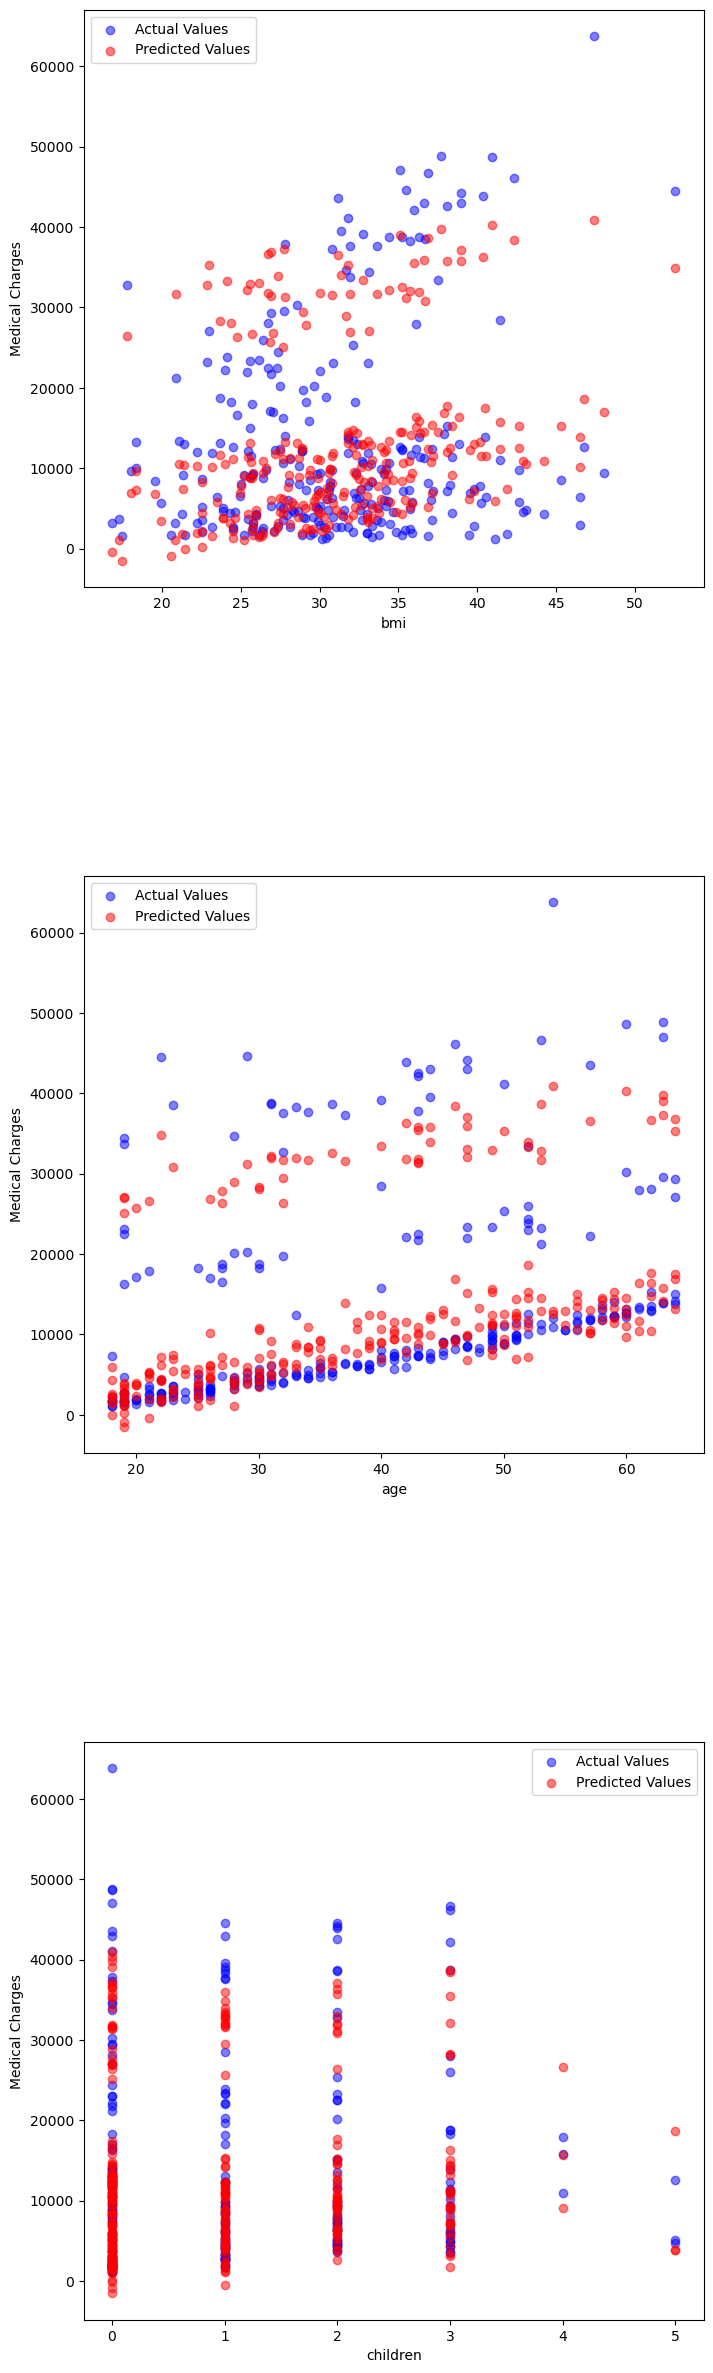

In [ ]:
#Plotting the features of actual vs predicted value- continuous
features = ['bmi', 'age', 'children']
fig, axs = plt.subplots(nrows=len(features), figsize=(8, 30))
fig.subplots_adjust(hspace=0.5)
for i, feature in enumerate(features):
    axs[i].scatter(X_test[feature], y_test, color='blue', alpha=0.5, label='Actual Values')
    axs[i].scatter(X_test[feature], y_pred_ln, color='red', alpha=0.5, label='Predicted Values')
    axs[i].set_xlabel(feature)
    axs[i].set_ylabel('Medical Charges')
    axs[i].legend()

plt.show()

# Dimensionality Reduction and Clustering
For the dimensionality reduction and clustering task, we're going to first reduce the dimensions using PCA and then cluster the first two principal components into 3 different clusters using the K-Means algorithm.

Note: The dataset was originally loaded here: https://www.kaggle.com/code/karnikakapoor/customer-segmentation-clustering

In [ ]:
# Load in the dataset.
data = pd.read_csv("data/marketing_campaign_preprocessed.csv")
data

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6
4,PhD,Married,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,Graduation,Married,61223.0,0,1,46,709,43,182,42,118,247,2,9,3,4,5
2212,PhD,Together,64014.0,2,1,56,406,0,30,0,0,8,7,8,2,5,7
2213,Graduation,Divorced,56981.0,0,0,91,908,48,217,32,12,24,1,2,3,13,6
2214,Master,Together,69245.0,0,1,8,428,30,214,80,30,61,2,6,5,10,3


In [ ]:
# Turn the categorical columns into one-hot encoded columns.
data = pd.get_dummies(data, columns=['Education', 'Kidhome', 'Teenhome', 'Marital_Status'])

In [ ]:
# Because there are a lot of different columns, let's use PCA in order to reduce the number of dimensions to 3.
# In order to properly use PCA, we need to standardize/normalize every single one of these columns. 

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data),columns= data.columns )

In [ ]:
# Use PCA to transform these columns into 2 different principal components.
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

# Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_components = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

In [ ]:
# PCA Variance Measure
pca.explained_variance_ratio_

array([0.83305632, 0.1543057 ])

In [ ]:
sum(pca.explained_variance_ratio_[:2])

0.9873620141114114

In [ ]:
#These two components preformed wonderfully.

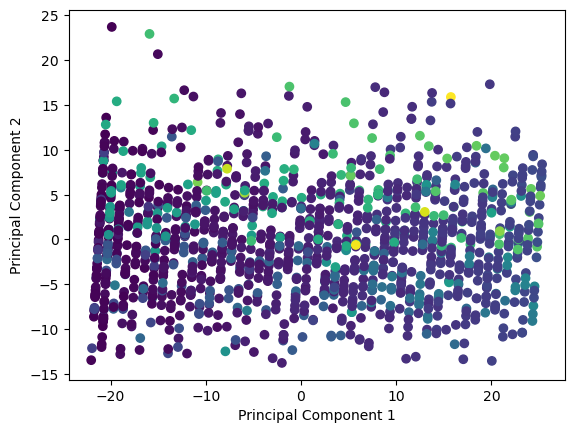

In [ ]:
# Visualize the two different principal components in the form of a scatter plot.
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
# Using K-Means clustering, cluster the two principal components into 3 different clusters.
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_pca)
cluster_predictions = kmeans.predict(X_pca)

In [ ]:
# View the cluster centers.
kmeans.cluster_centers_

array([[ 16.3763447 ,   0.10929187],
       [  0.48245859,  -0.27737169],
       [-15.80337423,   0.14771967]])

In [ ]:
# Assign the cluster predictions to a variable called "cluster_predictions"

cluster_df = pd.DataFrame({'PC1': pca_components['PC1'], 'PC2': pca_components['PC2'], 'cluster_predictions': cluster_predictions})

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

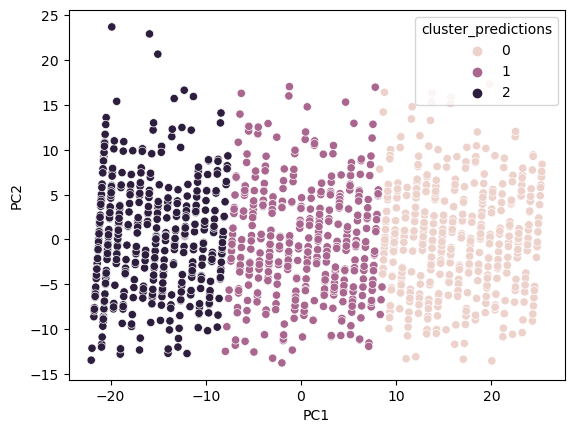

In [ ]:
# For these 3 clusters, plot a scatter plot with the different clusters in different hues.
sns.scatterplot(x='PC1', y='PC2', hue='cluster_predictions', data=cluster_df)
